In [1]:
"""
Introducing Python ...
"""

print("Hello, World!")

x = 1
y = 5
z = x + y
print("x + y = ", z)

message = "Hello, World!"
print(message)

my_name = 'Raf'
message2 = my_name + ' says "Hello, World!"'
print(message2)

long_message = """
This is a long message. It spans
more than one line. Python won't let you do 
this with single single or double quotes, so you need to 
use triple single or double quotes.
"""
print(long_message)

var1 = "She said:"
var2 = "He said:"
print(var1, "Do you like my hat?")
print(var2, "No, I do not like your hat!")
print(var1, "Goodbye!")
print(var2, 'Goodbye!')

Hello, World!
x + y =  6
Hello, World!
Raf says "Hello, World!"

This is a long message. It spans
more than one line. Python won't let you do 
this with single single or double quotes, so you need to 
use triple single or double quotes.

She said: Do you like my hat?
He said: No, I do not like your hat!
She said: Goodbye!
He said: Goodbye!


In [7]:
"""
Create a list that stores the main text of Moby Dick
"""

# Import file into a Python list
moby_file = open('2701-0.txt')
moby_lines = []
for line in moby_file.readlines():
    line = line.strip()
    moby_lines.append(line)

# See the first ten lines    
first_lines = moby_lines[0:10]
# print('first_lines', first_lines)

# Same thing, but with implicit start
# Note that we are overwriting first_lines
first_lines = moby_lines[:10]

# See that last ten lines
last_lines = moby_lines[-10:]
    
# Remove cruft
start_line = 'Call me Ishmael'
end_line = 'children, only found another orphan.'
start_index = None
end_index = None
for i, line in enumerate(moby_lines):
    if start_line in line:
        start_index = i - 1
    elif end_line in line:
        end_index = i + 1
    else:
        continue
moby_text = moby_lines[start_index:end_index]
# print(moby_text)

In [13]:
"""
Create a dictionary of words and plot word counts for Moby Dick
"""
##############################################################
# FROM moby1.py
##############################################################

# Import file into a Python list
moby_file = open('2701-0.txt')
moby_lines = []
for line in moby_file.readlines():
    line = line.strip()
    moby_lines.append(line)
    
# Remove cruft

# Find the start lines and end lines of the text
start_line = 'Call me Ishmael'
end_line = 'children, only found another orphan.'

# Declare variables to use when creating a slice of our list
start_index = None
end_index = None

# Loop through the list, getting the index as we go
for i, line in enumerate(moby_lines):
    if start_line in line:
        start_index = i - 1
    elif end_line in line:
        end_index = i + 1
    else:
        continue

# Create a new list as a slice from from the old one
# using the indices you just found
moby_text = moby_lines[start_index:end_index]

##############################################################
# New stuff
##############################################################

# At this point, we begin to use regular expressions
import re

# Remove chapter headdings by looping through a
# copy of the our new list
for i, line in enumerate(moby_text):
    if re.search('^CHAPTER ', line):
        moby_text[i] = ''

# Create one big line
moby_bigline = ' '.join(moby_text)

# Normalize" the text (aka deformance)
moby_bigline = re.sub(r'\W+', ' ', moby_bigline)
moby_bigline = re.sub('_', ' ', moby_bigline)
moby_bigline = moby_bigline.lower()

# Tokenize
moby_words = re.split(r'\s+', moby_bigline)

# Remove stopwords

# First, get the stopwords
stops = []
for stop in open('stopwords.txt').readlines():
    stop = stop.strip()
    stops.append(stop)
    
# Then repalce stops with blanks
for i, word in enumerate(moby_words):
    if word in stops:
        moby_words[i] = ''

# Now, use this one neat trick to cinch up the list
moby_bigline = ' '.join(moby_words).strip()
moby_words = re.split(r'\s+', moby_bigline)

# Get word counts and a dictionary
moby_word_counts = {}
for word in moby_words:
    if word in moby_word_counts:
        moby_word_counts[word] = moby_word_counts[word] + 1
    else:
        moby_word_counts[word] = 1

dictionary = sorted(moby_word_counts.keys())

# Plot the top words

# Get the highest counts
top_counts = sorted(list(moby_word_counts.values()))[-20:]

# Find words in the moby_word_counts with those values
# Create X and Y lists to use in a plot
top_words_x = []
top_words_y = []
for count in top_counts:
    for word in moby_word_counts:
        if moby_word_counts[word] == count:
            top_words_x.append(word)
            top_words_y.append(count)
            
# Use Python plotting libraries to show
# %matplotlib inline
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.barplot(top_words_x, top_words_y)
# plt.show()
print(top_words_x, top_words_y)
import plotly.plotly as py
import plotly.tools as tl
import plotly.graph_objs as go

tl.set_credentials_file(username='ZoeLeBlanc', api_key='fs7OmVvfC2PPa8g6e2Ju')

data = [go.Bar(
            x=top_words_x,
            y=top_words_y
    )]

py.iplot(data, filename='basic-bar')

['last', 'white', 'must', 'seemed', 'boat', 'captain', 'great', 'two', 'said', 'still', 'time', 'head', 'time', 'head', 'long', 'ship', 'ahab', 'sea', 'old', 'man', 'whale', 'â'] [275, 280, 281, 282, 285, 289, 290, 291, 294, 312, 328, 328, 328, 328, 330, 419, 424, 434, 445, 459, 1011, 3676]


Training the model
PCA time
Plotting


/Users/zgl3n/.local/share/virtualenvs/data-analysis-GZuBTKDw/lib/python3.6/site-packages/ipykernel_launcher.py:96: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



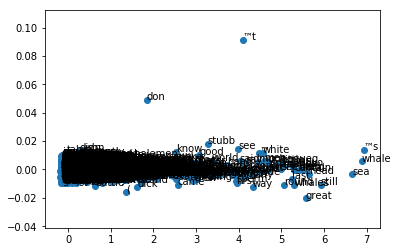

KeyboardInterrupt: 

In [15]:
"""
Create a list of sentences for the text and try word2vec
"""

##############################################################
# FROM moby2.py
##############################################################

# Import file into a Python list
moby_file = open('2701-0.txt')
moby_lines = []
for line in moby_file.readlines():
    line = line.strip()
    moby_lines.append(line)
    
# Remove cruft

# Find the start lines and end lines of the text
start_line = 'Call me Ishmael'
end_line = 'children, only found another orphan.'

# Declare variables to use when creating a slice of our list
start_index = None
end_index = None

# Loop through the list, getting the index as we go
for i, line in enumerate(moby_lines):
    if start_line in line:
        start_index = i - 1
    elif end_line in line:
        end_index = i + 1
    else:
        continue

# Create a new list as a slice from from the old one
# using the indices you just found
moby_text = moby_lines[start_index:end_index]

# At this point, we begin to use regular expressions
import re

# Remove chapter headdings by looping through a
# copy of the our new list
for i, line in enumerate(moby_text[:]):
    if re.search('^CHAPTER ', line):
        moby_text[i] = ''

# Create one big line
moby_bigline = ' '.join(moby_text)

##############################################################
# New stuff
##############################################################


# Create one big line and deform (normalize)
moby_bigline = ' '.join(moby_text)
moby_bigline = moby_bigline.lower()
moby_bigline = re.sub(r'-+', ' ', moby_bigline)
moby_bigline = re.sub(r'â€”+', ' ', moby_bigline)
moby_bigline = re.sub(r'_+', ' ', moby_bigline)
moby_bigline = re.sub(r'"+', ' ', moby_bigline)
#moby_bigline = re.sub(r"'+", ' ', moby_bigline)
moby_bigline = re.sub(r',+', ' ', moby_bigline)
#moby_bigline = re.sub(r'â€™', ' ', moby_bigline)
moby_bigline = re.sub(r'[â€œâ€]', ' ', moby_bigline)
moby_bigline = re.sub(r'\s+', ' ', moby_bigline)

# Get some stopwords
stops = set()
for stop in open('stopwords.txt').readlines():
    stops.add(stop.strip())

# Split into sentences
moby_sentences = re.split(r'[.;?!:]', moby_bigline)    
moby_sentences2 = []
for sentence in moby_sentences:
    words = sentence.split()
    words_sans = set(words) - stops
    moby_sentences2.append(list(words_sans))
    
# Remove emptys
for i, sentence in enumerate(moby_sentences2):
    if len(sentence) < 3:
        del(moby_sentences2[i])
        
from gensim.models import Word2Vec

# train model
print("Training the model")
model = Word2Vec(moby_sentences2, min_count=1)

# fit a 2d PCA model to the vectors
print("PCA time")
from sklearn.decomposition import PCA
X = model[model.wv.vocab]
pca = PCA(n_components=3)
result = pca.fit_transform(X)

# create a scatter plot of the projection
print("Plotting")
from matplotlib import pyplot
alpha = pyplot.figure()
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

plot_url = py.plot_mpl(alpha, filename="mpl-scatter")